In [4]:
import pandas as pd
df = pd.read_csv("C:/Users/windows/Downloads/archive (3)/heart.csv")
print(df.head())
print(df.info())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

In [7]:
print(df.columns)
X = df.drop(columns=['target'])
y = df['target']


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [8]:
import pandas as pd
import numpy as np
if isinstance(X, np.ndarray):
    X_df = pd.DataFrame(X)  
else:
    X_df = X  
X_encoded = pd.get_dummies(X_df)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


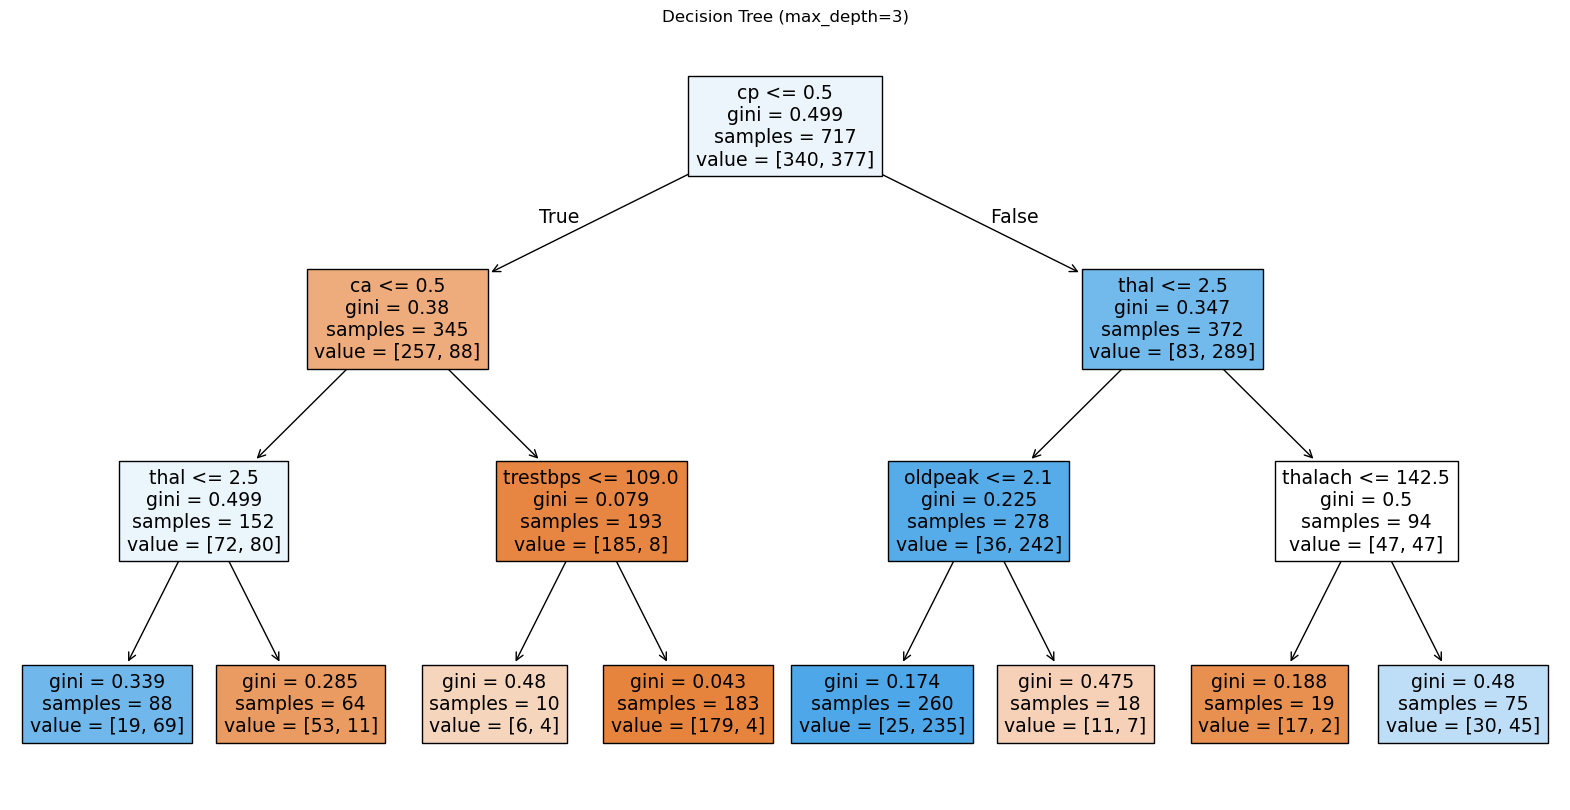

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=True if y.dtype == 'object' else None)
plt.title("Decision Tree (max_depth=3)")
plt.show()


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

y_pred_dt = clf.predict(X_test)
y_pred_rf = rf.predict(X_test)

print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt):.3f}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")



Decision Tree Accuracy: 0.805
Random Forest Accuracy: 0.981


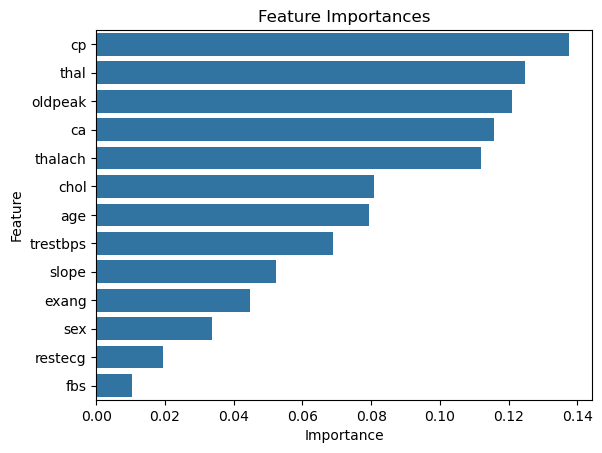

In [12]:
import seaborn as sns

importances = rf.feature_importances_
feat_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Feature Importances")
plt.show()


In [13]:
from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(clf, X, y, cv=5)
rf_scores = cross_val_score(rf, X, y, cv=5)

print(f"Decision Tree CV Accuracy: {dt_scores.mean():.3f} ± {dt_scores.std():.3f}")
print(f"Random Forest CV Accuracy: {rf_scores.mean():.3f} ± {rf_scores.std():.3f}")


Decision Tree CV Accuracy: 0.830 ± 0.021
Random Forest CV Accuracy: 0.994 ± 0.007
